In [7]:
# Pour faire apparaître les graphes sous forme d'images .png dans le notebook
%matplotlib inline
import csv
import numpy as np
from scipy.signal import *
from numpy.fft import *
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15}) # pour augmenter la taille de caractère dans les graphiques
from ipywidgets import * # Pour insérer des widgets (éléments graphiques) dans le notebook
# Attention! Installer scikit-learn pour avoir accès aux algorithmes de classification
# Installer version 0.20 au plus récente (0.22.1) pour avoir accès à la nouvelle fonction tree.plot_tree()
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier # Méthode KNN
from pandas import * # Structures de données
from sklearn.naive_bayes import GaussianNB
from scipy.ndimage import interpolation, median_filter

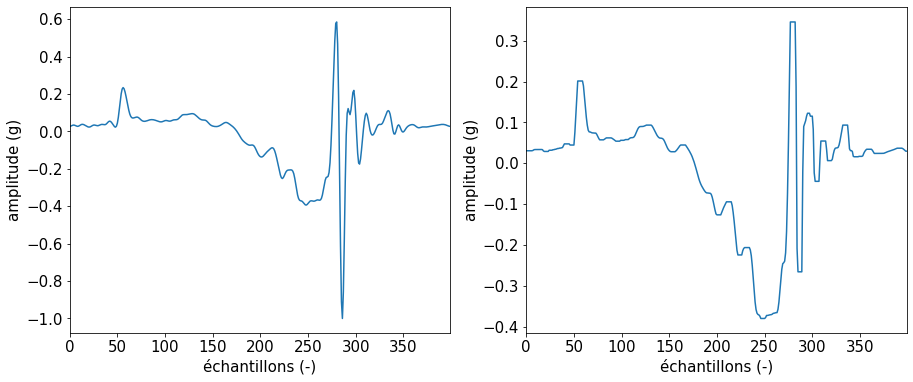

In [18]:
largeur=15
hauteur=6

data_input = 'etapdance2/step_raw_ex.txt'

data_raw = pandas.read_csv(data_input,names=['Time (ms)','Gyro0X (deg)','Gyro0Y (deg)','Gyro0Z (deg)','Accel0X (g)','Accel0Y (g)','Accel0Z (g)','Gyro1X (deg)','Gyro1Y (deg)','Gyro1Z (deg)','Accel1X (g)','Accel1Y (g)','Accel1Z (g)'], dtype='a') 

Time = np.array(data_raw['Time (ms)'])[1:].astype(float)

# MPU0 6050 (talon)
Gyro0X = np.array(data_raw['Gyro0X (deg)'])[1:].astype(float)
Gyro0Y = np.array(data_raw['Gyro0Y (deg)'])[1:].astype(float)
Gyro0Z = np.array(data_raw['Gyro0Z (deg)'])[1:].astype(float)

Accel0X = np.array(data_raw['Accel0X (g)'])[1:].astype(float)
Accel0Y = np.array(data_raw['Accel0Y (g)'])[1:].astype(float)
Accel0Z = np.array(data_raw['Accel0Z (g)'])[1:].astype(float)


# MPU1 6050 (pointe)
Gyro1X = np.array(data_raw['Gyro1X (deg)'])[1:].astype(float)
Gyro1Y = np.array(data_raw['Gyro1Y (deg)'])[1:].astype(float)
Gyro1Z = np.array(data_raw['Gyro1Z (deg)'])[1:].astype(float)

Accel1X = np.array(data_raw['Accel1X (g)'])[1:].astype(float)
Accel1Y = np.array(data_raw['Accel1Y (g)'])[1:].astype(float)
Accel1Z = np.array(data_raw['Accel1Z (g)'])[1:].astype(float)


samples = 400
z = samples/len(Accel0Z) # zoom
Accel0Z_int = interpolation.zoom(Accel0Z,z)

Accel0Z_prep = Accel0Z_int/max(abs(Accel0Z_int))

Accel0Z_filt = median_filter(Accel0Z_prep,size=10)

plt.figure(figsize=(largeur,hauteur))
plt.subplot(1, 2, 1)
plt.plot(Accel0Z_prep)
plt.ylabel('amplitude (g)')
plt.xlabel('échantillons (-)')
plt.autoscale(axis='x',tight=True);
plt.subplot(1, 2, 2)
plt.plot(Accel0Z_filt)
plt.ylabel('amplitude (g)')
plt.xlabel('échantillons (-)')
plt.autoscale(axis='x',tight=True);
plt.savefig(fname='filtre_median_step_accel0Z.png')
plt.show()

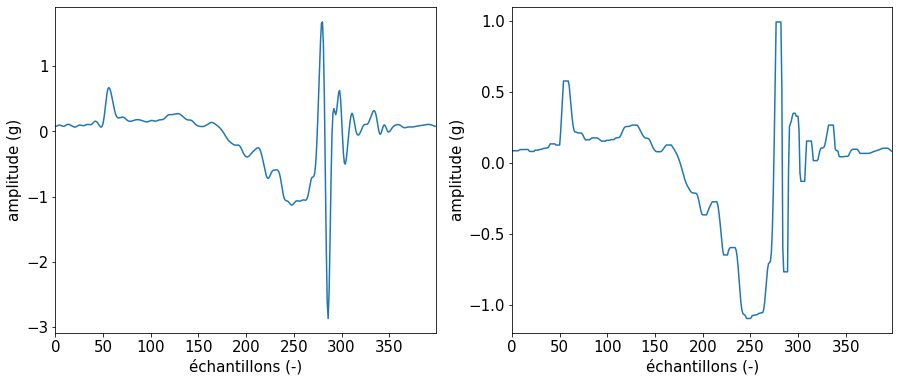

In [10]:
plt.figure(figsize=(largeur,hauteur))
plt.subplot(1, 2, 1)
plt.plot(Accel0Z_int)
plt.ylabel('amplitude (g)')
plt.xlabel('échantillons (-)')
plt.autoscale(axis='x',tight=True);
plt.subplot(1, 2, 2)
plt.plot(Accel0Z_filt)
plt.ylabel('amplitude (g)')
plt.xlabel('échantillons (-)')
plt.autoscale(axis='x',tight=True);
#plt.savefig(fname='segment_step_accel0Z.png')
plt.show()

In [41]:
pandas.Series(Accel0Z_int).corr(pandas.Series(Accel0Z_filt))

0.9158535629981596

In [52]:
largeur=15
hauteur=6

data_input = 'etapdance2/step_raw_ex2.txt'

data_raw = pandas.read_csv(data_input,names=['Time (ms)','Gyro0X (deg)','Gyro0Y (deg)','Gyro0Z (deg)','Accel0X (g)','Accel0Y (g)','Accel0Z (g)','Gyro1X (deg)','Gyro1Y (deg)','Gyro1Z (deg)','Accel1X (g)','Accel1Y (g)','Accel1Z (g)'], dtype='a') 

Time = np.array(data_raw['Time (ms)'])[1:].astype(float)

# MPU0 6050 (talon)
Gyro0X = np.array(data_raw['Gyro0X (deg)'])[1:].astype(float)
Gyro0Y = np.array(data_raw['Gyro0Y (deg)'])[1:].astype(float)
Gyro0Z = np.array(data_raw['Gyro0Z (deg)'])[1:].astype(float)

Accel0X = np.array(data_raw['Accel0X (g)'])[1:].astype(float)
Accel0Y = np.array(data_raw['Accel0Y (g)'])[1:].astype(float)
Accel0Z = np.array(data_raw['Accel0Z (g)'])[1:].astype(float)


# MPU1 6050 (pointe)
Gyro1X = np.array(data_raw['Gyro1X (deg)'])[1:].astype(float)
Gyro1Y = np.array(data_raw['Gyro1Y (deg)'])[1:].astype(float)
Gyro1Z = np.array(data_raw['Gyro1Z (deg)'])[1:].astype(float)

Accel1X = np.array(data_raw['Accel1X (g)'])[1:].astype(float)
Accel1Y = np.array(data_raw['Accel1Y (g)'])[1:].astype(float)
Accel1Z = np.array(data_raw['Accel1Z (g)'])[1:].astype(float)


samples = 400
z = samples/len(Accel0Z) # zoom
Accel0Z2_int = interpolation.zoom(Accel0Z,z)

Accel0Z2_filt = median_filter(Accel0Z2_int,size=10)